In [9]:
# # Import Dependencies
# %matplotlib inline

# import dask.dataframe as dd

# Begin Python Imports
import datetime, warnings, scipy
warnings.filterwarnings("ignore")
import seaborn as sns
from glob import glob

# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')


In [13]:
dfs = []

# Iterate over CSV files in the specified directory
for f in glob('dataset/flight_delay/*.csv'):
    try:
        df = pd.read_csv()
        dfs.append(df)
    except Exception as e:
        print(f"Error reading file {f}: {e}")

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)



Error reading file dataset/flight_delay\2016.csv: read_csv() missing 1 required positional argument: 'filepath_or_buffer'
Error reading file dataset/flight_delay\2017.csv: read_csv() missing 1 required positional argument: 'filepath_or_buffer'
Error reading file dataset/flight_delay\2018.csv: read_csv() missing 1 required positional argument: 'filepath_or_buffer'


ValueError: No objects to concatenate

In [11]:
# Check first 2 instances and last 2 instances
df.head(2).append(df.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
7213445,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,1535.0,7.0,1546,1542.0,-4.0,0.0,NaN,0.0,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check dimension of dataset
df.shape
print("There are "+ str(df.shape[0]) +" rows and "+ str(df.shape[1]) +" columns from the flight dataset.")

There are 7213446 rows and 28 columns from the flight dataset.


In [7]:
# Convert df column to datetime format
df['FL_DATE'] =  pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')

In [8]:
# Check column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [7]:
# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(df)

Proportion of missing data in columns
       column_name  percentage
0  ArrDelayMinutes    3.271005
1           TaxiIn    3.046403
2          ArrTime    3.046329
3          TaxiOut    3.007760
4  DepDelayMinutes    2.954527
5          DepTime    2.953007


In [8]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
        # return pd.to_datetime(heure, format='%H:%M:%S')
    
    # pd.to_datetime(heure, format='%Y-%m-%d')

In [9]:
df['DepTime'] = df['DepTime'].apply(format_heure)
df['CRSDepTime'] = df['CRSDepTime'].apply(format_heure)

df['ArrTime'] = df['ArrTime'].apply(format_heure) 
df['CRSArrTime'] = df['CRSArrTime'].apply(format_heure)

In [10]:
# Check first 2 instances and last 2 instances
df.head(2).append(df.tail(2))

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,11:33:00,11:23:00,0.0,12:28:00,0.0,4301,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,12:45:00
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,07:32:00,07:28:00,0.0,08:48:00,0.0,4299,12206,"Harlingen/San Benito, TX",Texas,12266,"Houston, TX",Texas,16.0,9.0,08:49:00
4078316,2022-03-25,Republic Airlines,EWR,PIT,False,True,21:29:00,23:22:00,113.0,09:39:00,NaN,3450,11618,"Newark, NJ",New Jersey,14122,"Pittsburgh, PA",Pennsylvania,25.0,6.0,22:55:00
4078317,2022-03-07,Republic Airlines,EWR,RDU,False,True,11:54:00,11:48:00,0.0,15:56:00,NaN,3585,11618,"Newark, NJ",New Jersey,14492,"Raleigh/Durham, NC",North Carolina,13.0,4.0,13:33:00


In [11]:
def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str)) 
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

df['Arr_elapse'] =  time_difference(df['ArrTime'],df['DepTime'])


# Remove incorrect record
df=df[df['Arr_elapse']>0]


In [12]:
# Check first 2 instances and last 2 instances
df.head(20).append(df.tail(2))

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,Arr_elapse
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,11:33:00,11:23:00,0.0,12:28:00,0.0,4301,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,12:45:00,65.0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,07:32:00,07:28:00,0.0,08:48:00,0.0,4299,12206,"Harlingen/San Benito, TX",Texas,12266,"Houston, TX",Texas,16.0,9.0,08:49:00,80.0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,15:29:00,15:14:00,0.0,16:36:00,0.0,4298,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,21.0,14.0,16:39:00,82.0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,14:35:00,14:30:00,0.0,15:47:00,0.0,4296,12266,"Houston, TX",Texas,11973,"Gulfport/Biloxi, MS",Mississippi,16.0,4.0,16:05:00,77.0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,11:35:00,11:35:00,0.0,12:51:00,6.0,4295,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,19.0,8.0,12:45:00,76.0
5,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DEN,TUL,False,False,09:55:00,09:52:00,0.0,12:38:00,0.0,4294,11292,"Denver, CO",Colorado,15370,"Tulsa, OK",Oklahoma,25.0,4.0,12:40:00,166.0
6,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,LCH,False,False,21:39:00,21:36:00,0.0,22:18:00,0.0,4293,12266,"Houston, TX",Texas,12915,"Lake Charles, LA",Louisiana,11.0,5.0,22:31:00,42.0
7,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",TYS,IAH,False,False,11:29:00,11:17:00,0.0,13:11:00,5.0,4292,15412,"Knoxville, TN",Tennessee,12266,"Houston, TX",Texas,22.0,16.0,13:06:00,114.0
8,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,AEX,False,False,14:24:00,14:14:00,0.0,15:13:00,0.0,4291,12266,"Houston, TX",Texas,10185,"Alexandria, LA",Louisiana,16.0,6.0,15:24:00,59.0
9,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,MOB,False,False,09:54:00,09:47:00,0.0,11:10:00,0.0,4290,12266,"Houston, TX",Texas,13422,"Mobile, AL",Alabama,17.0,6.0,11:21:00,83.0


In [13]:
# Check column type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3768808 entries, 0 to 4078317
Data columns (total 22 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Airline                          category      
 2   Origin                           category      
 3   Dest                             category      
 4   Cancelled                        bool          
 5   Diverted                         bool          
 6   CRSDepTime                       object        
 7   DepTime                          object        
 8   DepDelayMinutes                  float64       
 9   ArrTime                          object        
 10  ArrDelayMinutes                  float64       
 11  Flight_Number_Marketing_Airline  int64         
 12  OriginAirportID                  int64         
 13  OriginCityName                   object        
 14  OriginStateName                  c

In [14]:
import calendar
flight_date=pd.DatetimeIndex(df['FlightDate'])

df['DAY'] = flight_date.day
df['MONTH'] = flight_date.month
df['MONTH_AB'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])
df['DAYOFWEEK'] = flight_date.dayofweek
df['DAYNAME'] = df['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])

# 1 Weekday, 0 Weekend
daytype = []
for value in df['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1) #weekday
    else:
        daytype.append(0) #weekend
df['WEEKDAY'] = daytype
df.head(2)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,Arr_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,11:33:00,11:23:00,0.0,12:28:00,0.0,4301,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,12:45:00,65.0,4,4,Apr,0,Monday,1
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,07:32:00,07:28:00,0.0,08:48:00,0.0,4299,12206,"Harlingen/San Benito, TX",Texas,12266,"Houston, TX",Texas,16.0,9.0,08:49:00,80.0,4,4,Apr,0,Monday,1


In [15]:
# For checking
print('Maximum number of days in a month:', df.DAY.nunique())
print('Total number of months:', df.MONTH.nunique())
print('Total number of days per week:', df.DAYNAME.nunique())

print()

print('Months present in dataframe:',df.MONTH.unique())
print('Months present in dataframe:', df.MONTH_AB.unique())

print()
print('Days present in dataframe:', df['DAYOFWEEK'].unique())
print('Days present in dataframe:', df.DAYNAME.unique())

Maximum number of days in a month: 31
Total number of months: 7
Total number of days per week: 7

Months present in dataframe: [4 2 7 5 6 1 3]
Months present in dataframe: ['Apr' 'Feb' 'Jul' 'May' 'Jun' 'Jan' 'Mar']

Days present in dataframe: [0 6 5 4 1 2 3]
Days present in dataframe: ['Monday' 'Sunday' 'Saturday' 'Friday' 'Tuesday' 'Wednesday' 'Thursday']


In [16]:
airports = pd.read_csv('dataset/airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [17]:
# Check dimension of dataset
airports.shape
print("There are "+ str(airports.shape[0]) +" rows and "+ str(airports.shape[1]))

There are 353 rows and 3


In [18]:
print("There are "+str(len(airports.IATA_CODE.unique()))+" records")

There are 353 records


In [19]:
# Covert to list
airport_IATA_CODE = list(airports['IATA_CODE'])

In [20]:
df.Origin.unique()

['GJT', 'HRL', 'DRO', 'IAH', 'DEN', ..., 'GST', 'MVY', 'HYA', 'PIR', 'ATY']
Length: 375
Categories (375, object): ['ABE', 'ABI', 'ABQ', 'ABR', ..., 'XWA', 'YAK', 'YKM', 'YUM']

In [21]:
# Get the list of origin and destination from `df` 
flight_ORIGIN = df.Origin.unique().tolist()
flight_DEST = df.Dest.unique().tolist()

# Check type
print("Type:")
print(type(flight_ORIGIN))
print(type(flight_DEST))
print()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Type:
<class 'list'>
<class 'list'>

Length:
Origin: 375
Destination: 375


In [22]:
difference = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(difference)
print()
print("There are "+str(len(difference)))

IATA Code (Origin) that is not found from the airport data:
['PQI', 'SBY', 'PAE', 'USA', 'SFB', 'PIE', 'PGD', 'LCK', 'HGR', 'OWB', 'XWA', 'ALS', 'RIW', 'DDC', 'SHR', 'TBN', 'FOD', 'OGS', 'VCT', 'DEC', 'JST', 'MCW', 'YKM', 'PUW', 'ALW', 'EAT', 'SPN', 'BIH', 'PIR', 'ATY']

There are 30


In [23]:
# Between flight_DEST and airport_IATA_CODE
difference_2 = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(difference_2)
print()

IATA Code (Destination) that is not found from airport data:
['PQI', 'SBY', 'PAE', 'SFB', 'PIE', 'USA', 'LCK', 'PGD', 'HGR', 'OWB', 'RIW', 'ALS', 'VCT', 'DDC', 'JST', 'MCW', 'SHR', 'DEC', 'OGS', 'FOD', 'XWA', 'TBN', 'YKM', 'ALW', 'PUW', 'EAT', 'SPN', 'BIH', 'PIR', 'ATY']



In [24]:
# Creating a dictionary and looking at its type for QC purposes
airport_dict = pd.Series(airports.AIRPORT.values, index=airports.IATA_CODE).to_dict()
print(type(airport_dict))

<class 'dict'>


In [25]:
df['Origin'].replace(airport_dict, inplace=True)
df['Dest'].replace(airport_dict, inplace=True)
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,Arr_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",Grand Junction Regional AirportÂ (Walker Field),Denver International Airport,False,False,11:33:00,11:23:00,0.0,12:28:00,0.0,4301,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,12:45:00,65.0,4,4,Apr,0,Monday,1
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",Valley International Airport,George Bush Intercontinental Airport,False,False,07:32:00,07:28:00,0.0,08:48:00,0.0,4299,12206,"Harlingen/San Benito, TX",Texas,12266,"Houston, TX",Texas,16.0,9.0,08:49:00,80.0,4,4,Apr,0,Monday,1
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",Durango-La Plata County Airport,Denver International Airport,False,False,15:29:00,15:14:00,0.0,16:36:00,0.0,4298,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,21.0,14.0,16:39:00,82.0,4,4,Apr,0,Monday,1
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",George Bush Intercontinental Airport,Gulfport-Biloxi International Airport,False,False,14:35:00,14:30:00,0.0,15:47:00,0.0,4296,12266,"Houston, TX",Texas,11973,"Gulfport/Biloxi, MS",Mississippi,16.0,4.0,16:05:00,77.0,4,4,Apr,0,Monday,1
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",Durango-La Plata County Airport,Denver International Airport,False,False,11:35:00,11:35:00,0.0,12:51:00,6.0,4295,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,19.0,8.0,12:45:00,76.0,4,4,Apr,0,Monday,1


In [26]:
# Transformation of Target attribute: Flight status
status = []

for value in df['ArrDelayMinutes']:
    if value <= 15:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status 

In [27]:
# Exploratory Data Analysis
flight_category = df.select_dtypes(include=['object','category'])
flight_numerical = df.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

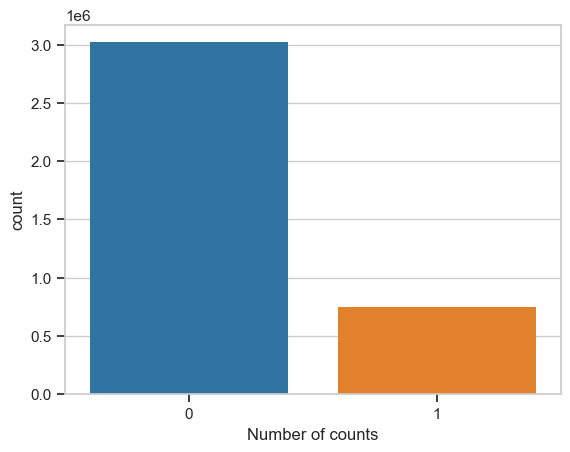

In [28]:
# Output Barplot showing the occurence of flight outcome

sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=df)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

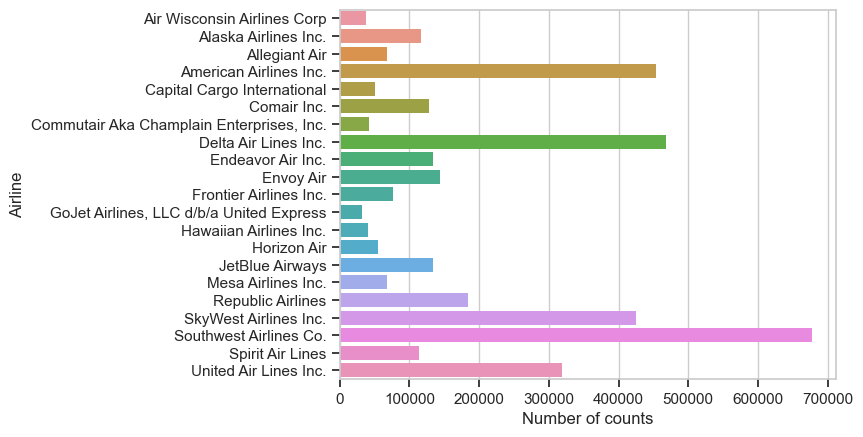

In [29]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="Airline",data=flight_category)
g.set(xlabel="Number of counts")

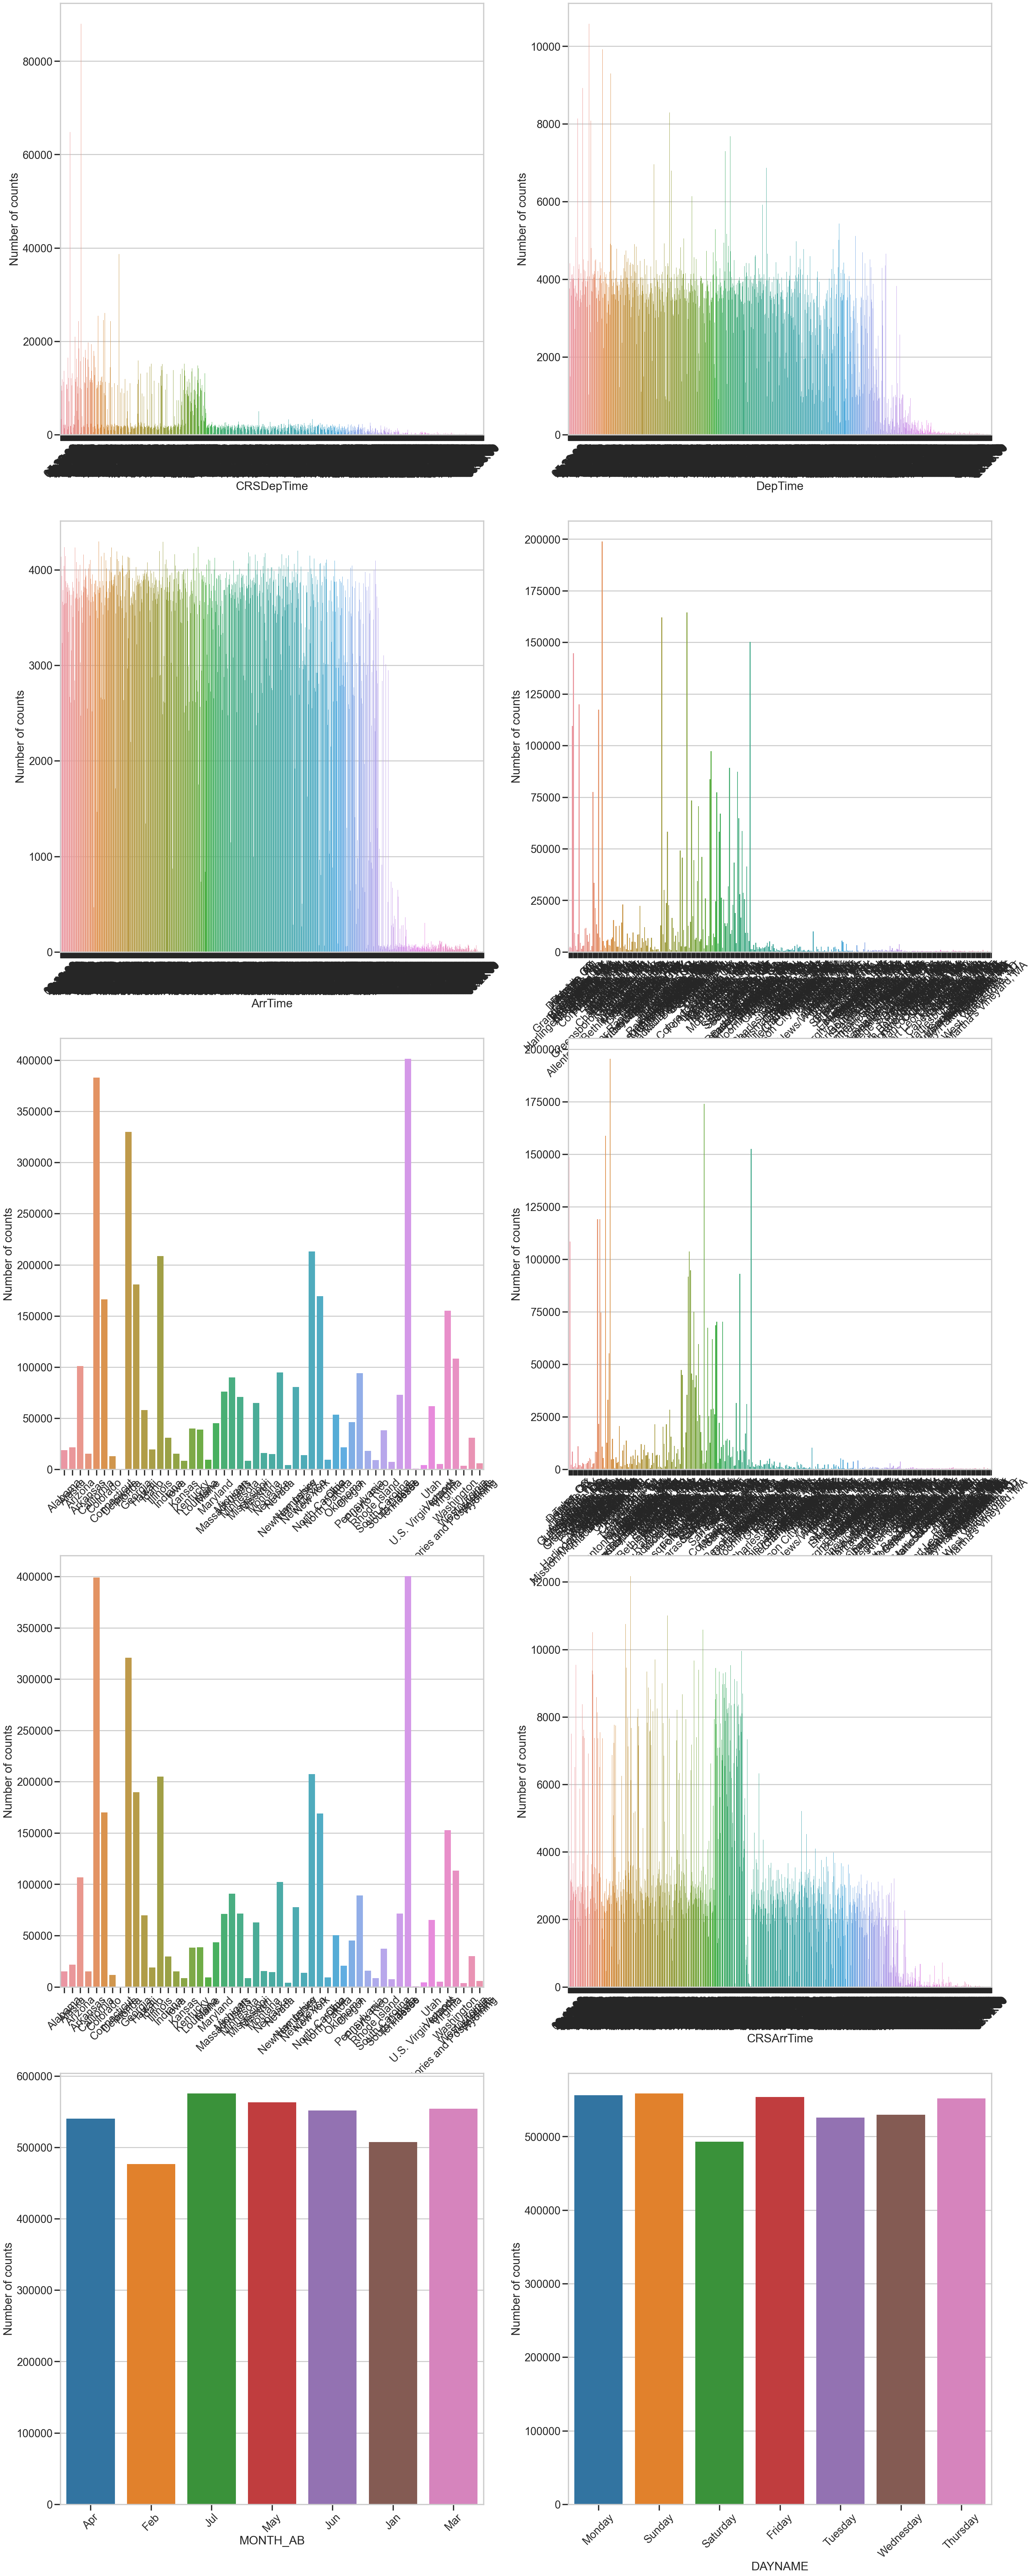

In [30]:
# Finding categorical features

category = []
for i in flight_category:
    if i in ["Origin","Dest","Airline","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)
        
# Output Barplot showing the occurence of each categorical features         
fig, ax = plt.subplots(ncols=2, figsize=(14,60))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(flight_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sns.countplot(x=feature,data=flight_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=45)
   
plt.show()

[Text(0.5, 0, 'Number of counts')]

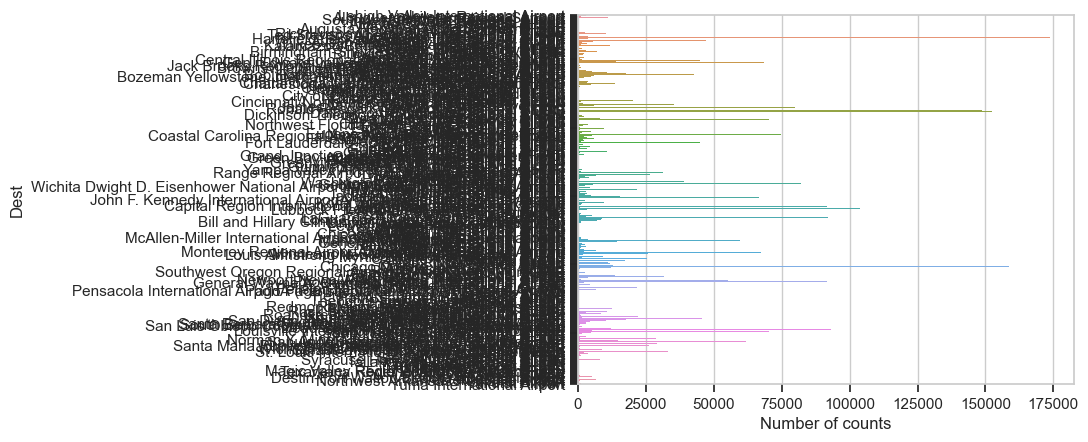

In [31]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="Dest",data=flight_category)
g.set(xlabel="Number of counts")

In [32]:
# Classification Modelling
# Data Preparation
# Encoding
# Feature Selection

Carrier = pd.get_dummies(df['Airline'],prefix="Airline",drop_first=False)
#Destination = pd.get_dummies(df['DEST'],drop_first=False)
#Destination.columns = ['Charlotte_Airport','Chicago_Airport','Dallas_Airpot','Denver_Airport','Dentroit_Airport','GELL_Airpot','George_Aiport','Hartsfield_Airport','JohnFKeenedy_Airpot','LaGuardia_Airport','LosAngelas_Airport','McCarran_Airport','MSP_Airport','NL_Airport','Orlando_Airport','Philadelphia_Airport','Phoenix_Airport','Ronald_Airport','SanFrancisco_Airport','Seattle_Aiport']                  
month= pd.get_dummies(df['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(df['DAYNAME'],prefix="DAY",drop_first=False)

#df_new=pd.concat([df,Carrier,Destination,month,day],axis=1)
df_new=pd.concat([df,Carrier,month,day],axis=1)


In [33]:
df_new.head(2)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,Arr_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,Airline_Air Wisconsin Airlines Corp,Airline_Alaska Airlines Inc.,Airline_Allegiant Air,Airline_American Airlines Inc.,Airline_Capital Cargo International,Airline_Comair Inc.,"Airline_Commutair Aka Champlain Enterprises, Inc.",Airline_Delta Air Lines Inc.,Airline_Endeavor Air Inc.,Airline_Envoy Air,Airline_Frontier Airlines Inc.,"Airline_GoJet Airlines, LLC d/b/a United Express",Airline_Hawaiian Airlines Inc.,Airline_Horizon Air,Airline_JetBlue Airways,Airline_Mesa Airlines Inc.,Airline_Republic Airlines,Airline_SkyWest Airlines Inc.,Airline_Southwest Airlines Co.,Airline_Spirit Air Lines,Airline_United Air Lines Inc.,MONTH_Apr,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",Grand Junction Regional AirportÂ (Walker Field),Denver International Airport,False,False,11:33:00,11:23:00,0.0,12:28:00,0.0,4301,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,12:45:00,65.0,4,4,Apr,0,Monday,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",Valley International Airport,George Bush Intercontinental Airport,False,False,07:32:00,07:28:00,0.0,08:48:00,0.0,4299,12206,"Harlingen/San Benito, TX",Texas,12266,"Houston, TX",Texas,16.0,9.0,08:49:00,80.0,4,4,Apr,0,Monday,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [34]:
[c for c in df_new.columns]

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'ArrTime',
 'ArrDelayMinutes',
 'Flight_Number_Marketing_Airline',
 'OriginAirportID',
 'OriginCityName',
 'OriginStateName',
 'DestAirportID',
 'DestCityName',
 'DestStateName',
 'TaxiOut',
 'TaxiIn',
 'CRSArrTime',
 'Arr_elapse',
 'DAY',
 'MONTH',
 'MONTH_AB',
 'DAYOFWEEK',
 'DAYNAME',
 'WEEKDAY',
 'FLIGHT_STATUS',
 'Airline_Air Wisconsin Airlines Corp',
 'Airline_Alaska Airlines Inc.',
 'Airline_Allegiant Air',
 'Airline_American Airlines Inc.',
 'Airline_Capital Cargo International',
 'Airline_Comair Inc.',
 'Airline_Commutair Aka Champlain Enterprises, Inc.',
 'Airline_Delta Air Lines Inc.',
 'Airline_Endeavor Air Inc.',
 'Airline_Envoy Air',
 'Airline_Frontier Airlines Inc.',
 'Airline_GoJet Airlines, LLC d/b/a United Express',
 'Airline_Hawaiian Airlines Inc.',
 'Airline_Horizon Air',
 'Airline_JetBlue Airways',
 'Airline_Mesa Airlines Inc.',
 'Airline_Republ

In [35]:
# Drop the redundant columns 

df_new.drop(['FlightDate', 
                      'Airline',
                      'Origin',
                      'Dest',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY'
                 ],
                 axis = 1, inplace = True)

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3768808 entries, 0 to 4078317
Data columns (total 54 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   Cancelled                                          bool    
 1   Diverted                                           bool    
 2   CRSDepTime                                         object  
 3   DepTime                                            object  
 4   DepDelayMinutes                                    float64 
 5   ArrTime                                            object  
 6   ArrDelayMinutes                                    float64 
 7   Flight_Number_Marketing_Airline                    int64   
 8   OriginAirportID                                    int64   
 9   OriginCityName                                     object  
 10  OriginStateName                                    category
 11  DestAirportID                        

In [37]:
df_new.head(10)

,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,Arr_elapse,FLIGHT_STATUS,Airline_Air Wisconsin Airlines Corp,Airline_Alaska Airlines Inc.,Airline_Allegiant Air,Airline_American Airlines Inc.,Airline_Capital Cargo International,Airline_Comair Inc.,"Airline_Commutair Aka Champlain Enterprises, Inc.",Airline_Delta Air Lines Inc.,Airline_Endeavor Air Inc.,Airline_Envoy Air,Airline_Frontier Airlines Inc.,"Airline_GoJet Airlines, LLC d/b/a United Express",Airline_Hawaiian Airlines Inc.,Airline_Horizon Air,Airline_JetBlue Airways,Airline_Mesa Airlines Inc.,Airline_Republic Airlines,Airline_SkyWest Airlines Inc.,Airline_Southwest Airlines Co.,Airline_Spirit Air Lines,Airline_United Air Lines Inc.,MONTH_Apr,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
0,False,False,11:33:00,11:23:00,0.0,12:28:00,0.0,4301,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,12:45:00,65.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,False,False,07:32:00,07:28:00,0.0,08:48:00,0.0,4299,12206,"Harlingen/San Benito, TX",Texas,12266,"Houston, TX",Texas,16.0,9.0,08:49:00,80.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,False,False,15:29:00,15:14:00,0.0,16:36:00,0.0,4298,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,21.0,14.0,16:39:00,82.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,False,False,14:35:00,14:30:00,0.0,15:47:00,0.0,4296,12266,"Houston, TX",Texas,11973,"Gulfport/Biloxi, MS",Mississippi,16.0,4.0,16:05:00,77.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,False,False,11:35:00,11:35:00,0.0,12:51:00,6.0,4295,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,19.0,8.0,12:45:00,76.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,False,False,09:55:00,09:52:00,0.0,12:38:00,0.0,4294,11292,"Denver, CO",Colorado,15370,"Tulsa, OK",Oklahoma,25.0,4.0,12:40:00,166.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
6,False,False,21:39:00,21:36:00,0.0,22:18:00,0.0,4293,12266,"Houston, TX",Texas,12915,"Lake Charles, LA",Louisiana,11.0,5.0,22:31:00,42.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7,False,False,11:29:00,11:17:00,0.0,13:11:00,5.0,4292,15412,"Knoxville, TN",Tennessee,12266,"Houston, TX",Texas,22.0,16.0,13:06:00,114.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
8,False,False,14:24:00,14:14:00,0.0,15:13:00,0.0,4291,12266,"Houston, TX",Texas,10185,"Alexandria, LA",Louisiana,16.0,6.0,15:24:00,59.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9,False,False,09:54:00,09:47:00,0.0,11:10:00,0.0,4290,12266,"Houston, TX",Texas,13422,"Mobile, AL",Alabama,17.0,6.0,11:21:00,83.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [39]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((3015046, 53), (753762, 53))

In [40]:

# Now, you can apply the DropConstantFeatures transformer
sel = DropConstantFeatures(tol=1, variables=None, missing_values='ignore')
sel.fit(X_train)


DropConstantFeatures(missing_values='ignore')

In [41]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [42]:
sel.features_to_drop_

['Cancelled']

In [43]:
# Drop the redundant columns 
flight_data_new.drop([], axis = 1, inplace = True)

In [44]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((3015046, 52), (753762, 52))

In [45]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [46]:
corrmat

,feature1,feature2,corr
0,DepDelayMinutes,ArrDelayMinutes,0.980028
1,ArrDelayMinutes,DepDelayMinutes,0.980028


In [47]:
corrmat.feature1.unique()

array(['DepDelayMinutes', 'ArrDelayMinutes'], dtype=object)

In [48]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 52 total features


In [49]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

          feature1         feature2      corr
0  DepDelayMinutes  ArrDelayMinutes  0.980028



In [50]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[0]
group

,feature1,feature2,corr
0,DepDelayMinutes,ArrDelayMinutes,0.980028


In [51]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['DepDelayMinutes']

# train a random forest 
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [52]:
# get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
0,ArrDelayMinutes,0.711419
1,DepDelayMinutes,0.288581


In [53]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [54]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 52 total features


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((3015046, 53), (753762, 53))

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a label encoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le

# Apply the same label encoders to the test data
for col, le in label_encoders.items():
    X_test[col] = le.transform(X_test[col])

# Now, you can fit the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)

ValueError: Cannot cast object dtype to float32